<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-model" data-toc-modified-id="load-model-1">load model</a></span></li><li><span><a href="#test-model" data-toc-modified-id="test-model-2">test model</a></span></li></ul></div>

# load model

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import json
import re

In [2]:
model_list = os.listdir("../models/")

In [3]:
model_list

['14-0.02-0.99.h5',
 '18-0.02-0.99.h5',
 '10-0.02-0.99.h5',
 '2-0.09-0.97.h5',
 '1-0.22-0.93.h5',
 '3-0.06-0.98.h5',
 '8-0.05-0.99.h5',
 '19-0.00-1.00.h5']

In [4]:
model = tf.keras.models.load_model("../models/" + model_list[-1])

In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 1280)              4049571   
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 4,712,621
Trainable params: 4,669,574
Non-trainable params: 43,047
_________________________________________________________________


# test model

In [6]:
def test_model(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = image[np.newaxis, :, :, :]
    pred = model.predict(image, batch_size=1)
    return np.argmax(pred)

In [7]:
test_dir = os.getenv("HOME") + "/UDIGO/test_img"

In [8]:
with open("../data/place_10_label.json", "r") as f:
    label_dict = json.load(f)

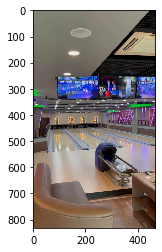

Image: 볼링장.jpeg
Prediction: 9
True


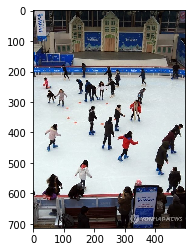

Image: 아이스링크.jpeg
Prediction: 3
True


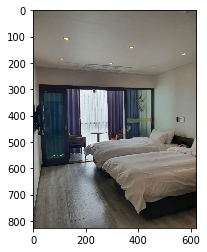

Image: 호텔.jpeg
Prediction: 2
True


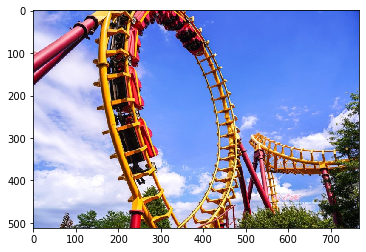

Image: 놀이동산.jpeg
Prediction: 8
True


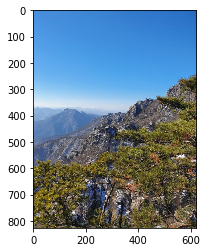

Image: 산.jpeg
Prediction: 0
True


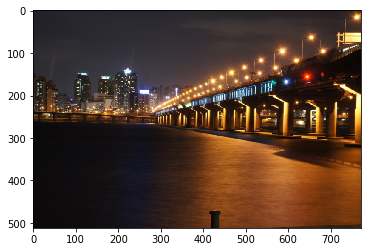

Image: 다리.jpeg
Prediction: 5
True


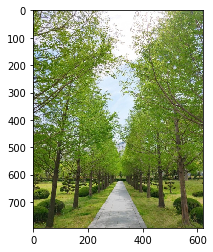

Image: 공원.jpeg
Prediction: 6
True


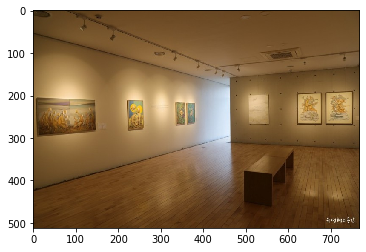

Image: 미술관.jpeg
Prediction: 1
True


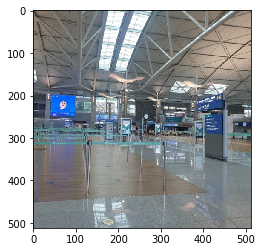

Image: 공항.jpeg
Prediction: 7
True


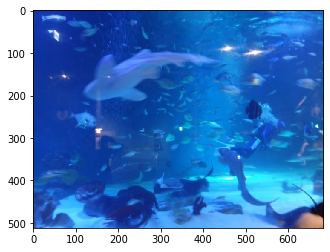

Image: 아쿠아리움.jpeg
Prediction: 4
True


In [9]:
for filename in os.listdir(test_dir):
    img_path = os.path.join(test_dir, filename)
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
    
    pred = test_model(img_path)
    label = re.sub("[^ㄱ-ㅎ가-힣]", "", filename)
    label = label_dict[label]
    
    print("Image:", filename)
    print("Prediction:", pred)
    print(pred == label)